## Logistic regression: Cancer problem

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

### read the data

In [23]:
data = pd.read_csv('data.csv', header=0)
# header 0 means our 0th row is column name
data.head()


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  sm

In [ ]:
data.info()

In [24]:
# data wrangling
data.drop("Unnamed: 32", axis=1, inplace=True)
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [25]:
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


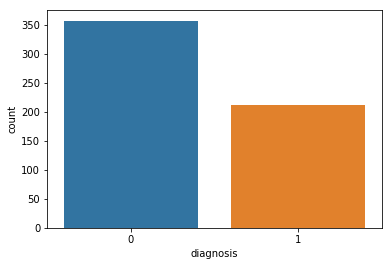

In [26]:
sns.countplot(data['diagnosis'], label='count')
plt.show()

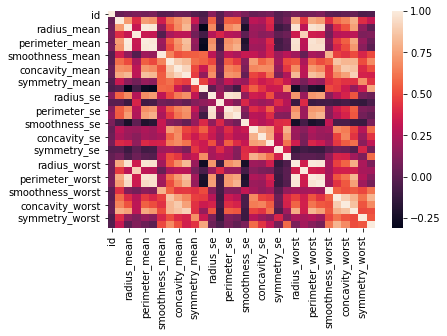

In [27]:
corr = data.corr()  # used to find the correlation between input values
sns.heatmap(corr)
plt.show()

In [28]:
prediction_var = ['texture_mean', 'perimeter_mean', 'smoothness_mean',
                 'compactness_mean', 'symmetry_mean']
# these are the variables which we will use for prediction


In [29]:
# now split the data into training and testing
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3)
print(train.shape)
print(test.shape)

(398, 32)
(171, 32)


In [30]:
train_X = train[prediction_var]  # extracting only required columns from the training data
train_Y = train.diagnosis  # train['diagnosis']
# same we do for test data
test_X = test[prediction_var]
test_Y = test.diagnosis  # output value of test data


### logistic regression

In [31]:
logistic = LogisticRegression()
# train the model
logistic.fit(train_X, train_Y)

temp = logistic.predict(test_X)
from sklearn import metrics
metrics.accuracy_score(test_Y, temp) # to check the accuracy of the model
# accuracy_score(y_true, y_predicted)


0.8947368421052632